## Plot results of OOI detection, compare to downdip tremor

In [13]:
import os
import pickle
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import numpy as np
import obspy
from obspy.clients.fdsn.client import Client 
import obspy
import pandas as pd
import scipy.ndimage
import geopy.distance
import random
#client = Client('IRIS')
import scipy
import seaborn as sn

import matplotlib 
#matplotlib.rcParams['font.family']=['Arial']
plt.rcParams.update({'font.size': 12})

## Read in results

In [28]:
file_name = 'results/HYSB1_HHN_3-10Hz_classifications.pickle'
with open(file_name,'rb') as handle:
    hysb1_classifications = pickle.load(handle)

In [3]:
'''
file_name = 'results/HYSB1_HYS14_HHN_3-10Hz_classifications.pickle'
with open(file_name,'rb') as handle:
    hys14_hysb1_classifications = pickle.load(handle)
    
file_name = 'results/HYS14_HHN_3-10Hz_classifications.pickle'
with open(file_name,'rb') as handle:
    hys14_hysb1_classifications = pickle.load(handle)
'''

"\nfile_name = 'results/HYSB1_HYS14_HHN_3-10Hz_classifications.pickle'\nwith open(file_name,'rb') as handle:\n    hys14_hysb1_classifications = pickle.load(handle)\n    \nfile_name = 'results/HYS14_HHN_3-10Hz_classifications.pickle'\nwith open(file_name,'rb') as handle:\n    hys14_hysb1_classifications = pickle.load(handle)\n"

In [30]:
print(len(hysb1_classifications))

30055


In [31]:
hysb1_tphase = [c for c in hysb1_classifications if (c[2]==1)]

hysb1_shipnoise = [c for c in hysb1_classifications if (c[3]>=1)]

hysb1_tremor = [c for c in hysb1_classifications if (c[2]>1) & (c[4]>100)]

In [32]:
print(len(hysb1_shipnoise)/len(hysb1_classifications))

0.6461487273332224


In [33]:
print(len(hysb1_tphase)/len(hysb1_classifications))

0.3160539011811679


## Plot detections and classifications

In [19]:
hysb1_color='#0868ac'

Text(0.5, 1.0, 'Potential tremor')

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

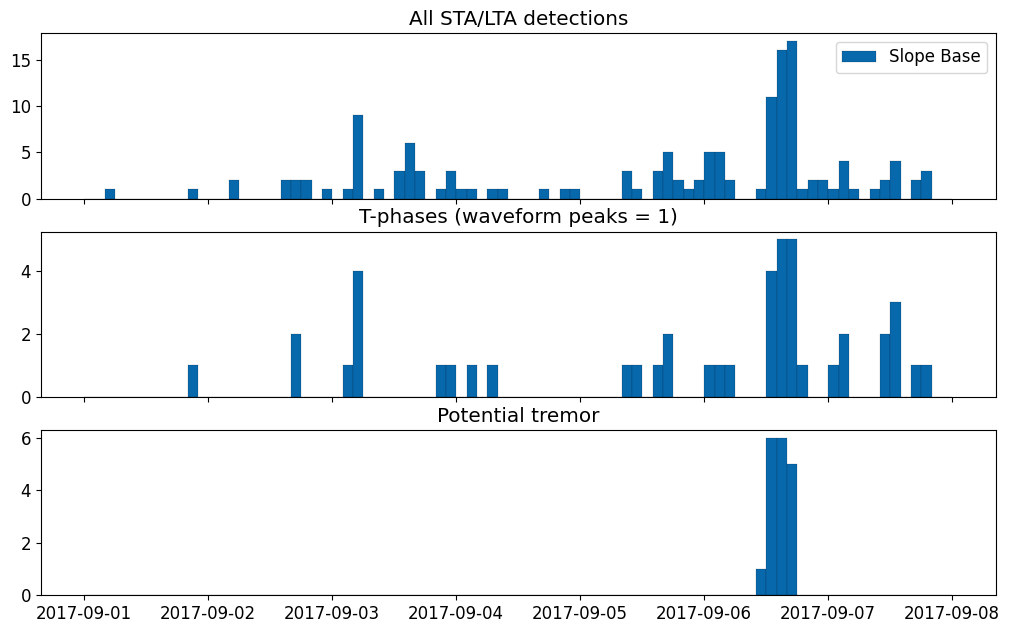

In [34]:
fig,ax = plt.subplots(3,figsize=[12.32,  7.3 ],sharex=True)


t1 = datetime.datetime(2017,9,1)
t2 = datetime.datetime(2017,9,8)

ax0 = ax[0]
ax1 = ax[1]
ax2 = ax[2]

timebins = pd.date_range(start=t1, end=t2, freq='2h')
ax0.hist([c[0][0].datetime for c in hysb1_classifications],bins=timebins,label='Slope Base',color=hysb1_color,linewidth=0.1,edgecolor='k');
ax0.set_title('All STA/LTA detections')
#ax0.set_ylim([0,1200])
ax0.legend()

timebins = pd.date_range(start=t1, end=t2, freq='2h')
ax1.hist([c[0][0].datetime for c in hysb1_tphase],bins=timebins,label='Slope Base',color=hysb1_color,linewidth=0.1,edgecolor='k');
ax1.set_title('T-phases (waveform peaks = 1)')
#ax1.set_ylim([0,1200])

timebins = pd.date_range(start=t1, end=t2, freq='2h')
ax2.hist([c[0][0].datetime for c in hysb1_tremor],bins=timebins,label='HYSB1',color=hysb1_color,linewidth=0.1,edgecolor='k');
ax2.set_title('Potential tremor')
#ax2.set_yscale('log')

# plt.savefig('/Users/zoekrauss/ooi_tremor/tremor_figs/ooi_detection_histogram.eps', bbox_inches='tight',dpi=400)

## Distribution of frequency ratios

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

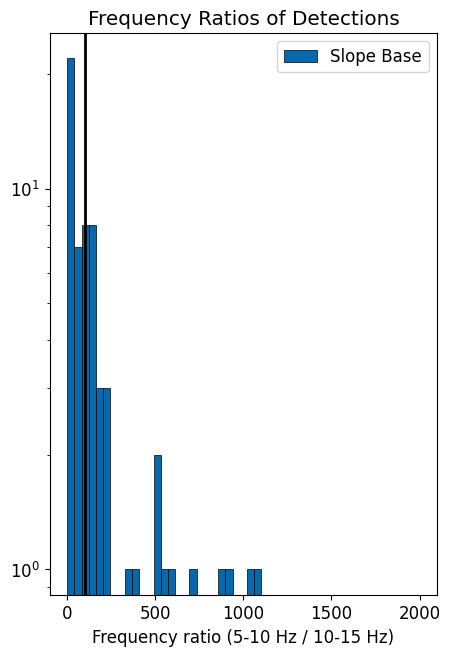

In [23]:
fig,ax = plt.subplots(1,figsize=[5,7.3])

bins = np.linspace(0,2000,50)
ax.hist([c[4] for c in hysb1_classifications],bins=bins,label='Slope Base',color=hysb1_color,edgecolor='k',linewidth=0.5);
ax.set_yscale('log')
ax.axvline(100,color='k',linewidth=2)
ax.set_title('Frequency Ratios of Detections')
ax.set_xlabel('Frequency ratio (5-10 Hz / 10-15 Hz)')
ax.legend()

# plt.savefig('/Users/zoekrauss/ooi_tremor/tremor_figs/ooi_frequency_ratios.eps', bbox_inches='tight',dpi=400)

## Read in manual validation of each of the potential FR>100 as yes or no
- This was done by visually verifying each tremor detection

In [11]:
file_name = 'results/HYS14_validations.pickle'
with open(file_name,'rb') as handle:
    hys14_validations = pickle.load(handle)
hys14_validations = [d[1] for d in hys14_validations]
hys14_yes = [d for i,d in enumerate(hys14_tremor) if hys14_validations[i]==1]
hys14_no = [d for i,d in enumerate(hys14_tremor) if hys14_validations[i]==0]

file_name = 'results/HYSB1_validations.pickle'
with open(file_name,'rb') as handle:
    hysb1_validations = pickle.load(handle)
hysb1_validations = [d[1] for d in hysb1_validations]
hysb1_yes = [d for i,d in enumerate(hysb1_tremor) if hysb1_validations[i]==1]
hysb1_no = [d for i,d in enumerate(hysb1_tremor) if hysb1_validations[i]==0]

NameError: name 'hysb1_tremor' is not defined

In [ ]:
hysb1_yes_times = [h[0] for h in hysb1_yes]

## Read in times of tremor from PNSN to compare

In [ ]:
# PNSN tremor
file_name = 'results/PNSN_tremor.pickle'
with open(file_name,'rb') as handle:
    pnsn_tremor = pickle.load(handle)

In [ ]:
# Filter PNSN tremor by lat/lon
keep_ind = [i for i,l in enumerate(pnsn_tremor[0]) if (l>44) & (l<45) & (pnsn_tremor[1][i]<-123.5)]
pnsn_times = [pnsn_tremor[2][i].datetime for i in keep_ind]

In [ ]:
from matplotlib import gridspec

fig = plt.subplots(figsize=[12,8],sharex=True)
gs = gridspec.GridSpec(2,1,height_ratios=[2,1])

t1 = datetime.datetime(2015,2,1)
t2 = datetime.datetime(2024,3,1)

ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

ax0.axvline(datetime.datetime(2015,10,21),color='goldenrod',linewidth=5,alpha=0.3,label='Slope Base sustained tremor')
ax0.axvline(datetime.datetime(2016,6,4),color='goldenrod',linewidth=5,alpha=0.3)
ax0.axvline(datetime.datetime(2017,9,6),color='goldenrod',linewidth=5,alpha=0.3)
ax0.axvline(datetime.datetime(2018,6,26),color='goldenrod',linewidth=5,alpha=0.3)

ax1.axvline(datetime.datetime(2015,10,21),color='goldenrod',linewidth=5,alpha=0.3,label='Long-duration tremor')
ax1.axvline(datetime.datetime(2016,6,4),color='goldenrod',linewidth=5,alpha=0.3)
ax1.axvline(datetime.datetime(2017,9,6),color='goldenrod',linewidth=5,alpha=0.3)
ax1.axvline(datetime.datetime(2018,6,26),color='goldenrod',linewidth=5,alpha=0.3)

ax0.plot([c[0][0].datetime for c in hys14_no],[c[4] for c in hys14_no],'^',color='lightgray',label='Hydrate Ridge, not tremor',markersize=10,markeredgecolor='k',markeredgewidth=0.5)
ax0.plot([c[0][0].datetime for c in hys14_yes],[c[4] for c in hys14_yes],'^',color=hysb1_color)

# ax0.plot([c[0][0].datetime for c in j26_no],[c[4] for c in j26_no],'s',color='lightgray',label='J26D, not tremor',markersize=8,markeredgecolor='k',markeredgewidth=0.5)
# ax0.plot([c[0][0].datetime for c in j26_yes],[c[4] for c in j26_yes],'s',color='orange',label='J26D, tremor',markersize=8,markeredgecolor='k',markeredgewidth=0.5)

ax0.plot([c[0][0].datetime for c in hysb1_no],[c[4] for c in hysb1_no],'.',color='lightgray',label='Slope Base, not tremor',markersize=15,markeredgecolor='k',markeredgewidth=0.5)
ax0.plot([c[0][0].datetime for c in hysb1_yes],[c[4] for c in hysb1_yes],'.',color=hysb1_color,label='Slope Base, tremor consistent',markersize=15,markeredgecolor='k',markeredgewidth=0.5)


ax0.legend()
ax0.set_ylabel('Frequency ratio')
# ax0.set_title('Detections with FR > 100')

timebins = pd.date_range(start=t1, end=t2, freq='w')
# ax1 = ax[1].twinx()
ax1.hist(pnsn_times,bins=timebins,color='darkgray',label='On-land PNSN tremor');
# ax1.hist([c[0][0].datetime for c in hysb1_yes],bins=timebins,color=hysb1_color,linewidth=0.1,edgecolor='k',label='HYSB1 tremor');
# ax1.legend()
# ax1.set_ylabel('HYSB1 tremor')
ax1.set_ylabel('PNSN tremor')
# ax1.set_title('Validated tremor detections vs. on-land tremor')

ax0.set_xlim([datetime.datetime(2015,1,1),datetime.datetime(2024,1,1)])
ax1.set_xlim([datetime.datetime(2015,1,1),datetime.datetime(2024,1,1)])
ax0.set_yscale('log')

# plt.savefig('/Users/zoekrauss/ooi_tremor/tremor_figs/ooi_validations.eps', bbox_inches='tight',dpi=400)

## Compare to timing of deep downdip tremor (ETS)

In [ ]:
# For each tremor detection, find nearest ETS time and make a histogram - keep track of sign

nearest_time = []
for i,t in enumerate(hysb1_yes):
    
    print(i,end='\r')
    
    shallow_times = t[0] # Tuple of start end trigger times
    
    times0 = [shallow_times[0]-obspy.UTCDateTime(tt) for tt in pnsn_times]
    times1 = [shallow_times[1]-obspy.UTCDateTime(tt) for tt in pnsn_times]
    
    min0 = np.min(np.abs(times0))
    min1 = np.min(np.abs(times1))
    
    which_min = np.argmin([min0,min1])
    
    if which_min==0:
        sign_arg = np.argmin(np.abs(times0))
        sign = np.sign(times0[sign_arg])
        nearest_time.append(sign*np.min(np.abs(times0)))
    
    if which_min==1:
        sign_arg = np.argmin(np.abs(times1))
        sign = np.sign(times1[sign_arg])
        nearest_time.append(sign*np.min(np.abs(times1)))
    

In [ ]:
# Convert time difference to days (from seconds)
nearest_time = [n/86400 for n in nearest_time]

In [ ]:
fig,ax = plt.subplots(2,constrained_layout=True)

test = [c[0][0].datetime for c in hysb1_yes]
keep_ind = [i for i,t in enumerate(test) if (t<datetime.datetime(2017,9,5)) or (t>datetime.datetime(2017,9,7))]

# All detections:
ax[0].hist(nearest_time,bins=300);
ax[0].set_title('Time to nearest ETS event')
ax[0].set_xlabel('Time (days)')

# Excluding the biggest event:
ax[1].hist([nearest_time[i] for i in keep_ind],bins=300)
ax[1].set_title('Time to nearest ETS event, excluding 2017-09-06')
ax[1].set_xlabel('Time (days)')

# plt.savefig('/Users/zoekrauss/ooi_tremor/tremor_figs/ets_comparison.eps', bbox_inches='tight',dpi=400)

## Do our tremor times coincide with those of large global earthquakes?

In [ ]:
# Global large earthquakes

t1 = obspy.UTCDateTime("2015-01-01T00:00:00")
t2 = obspy.UTCDateTime("2024-01-01T03:00:00")
large_cat = client.get_events(starttime=t1, endtime=t2, minmagnitude=7)
large_times = [c.origins[0].time for c in large_cat]

In [ ]:
# Plot time between a tremor detection and the most recent large magnitude earthquake
min_diff = []
for det in hysb1_yes:
    time_diffs = [det[0][0]-t for t in large_times]
    time_diffs = [t for t in time_diffs if t>0]
    time_min = np.min(time_diffs)
    min_diff.append(time_min/3600) # time in hours

In [ ]:
fig,ax = plt.subplots(2,tight_layout=True,sharex=True)

t1 = datetime.datetime(2015,2,1)
t2 = datetime.datetime(2024,3,1)


ax[0].plot([l.datetime for l in large_times],[c.magnitudes[0].mag for c in large_cat],'k.')
ax[0].set_title('Global earthquakes > M7')
ax[0].set_ylabel('Magnitude')
ax[0].set_xlim([datetime.datetime(2015,1,1),datetime.datetime(2024,1,1)])

ax[1].plot([c[0][0].datetime for c in hysb1_yes],min_diff,'o')

ax[1].set_xlim([datetime.datetime(2015,1,1),datetime.datetime(2024,1,1)])
ax[1].set_ylabel('Hours')
ax[1].set_title('Tremor: Time to nearest preceding M7 event')